In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



In [3]:
ins_data = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ricardo/Linear-Regression/medical_insurance_cost.csv')

ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins_data.shape

(1338, 7)

In [5]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


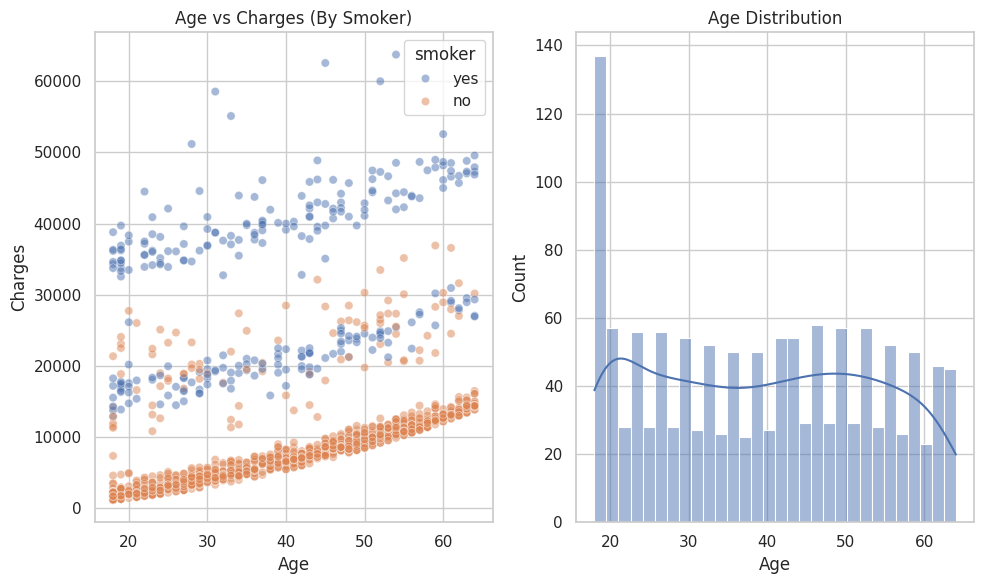

In [6]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=ins_data['age'], y=ins_data['charges'],hue=ins_data['smoker'],alpha=0.5)
plt.title('Age vs Charges (By Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.subplot(1, 2, 2)
sns.histplot(ins_data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

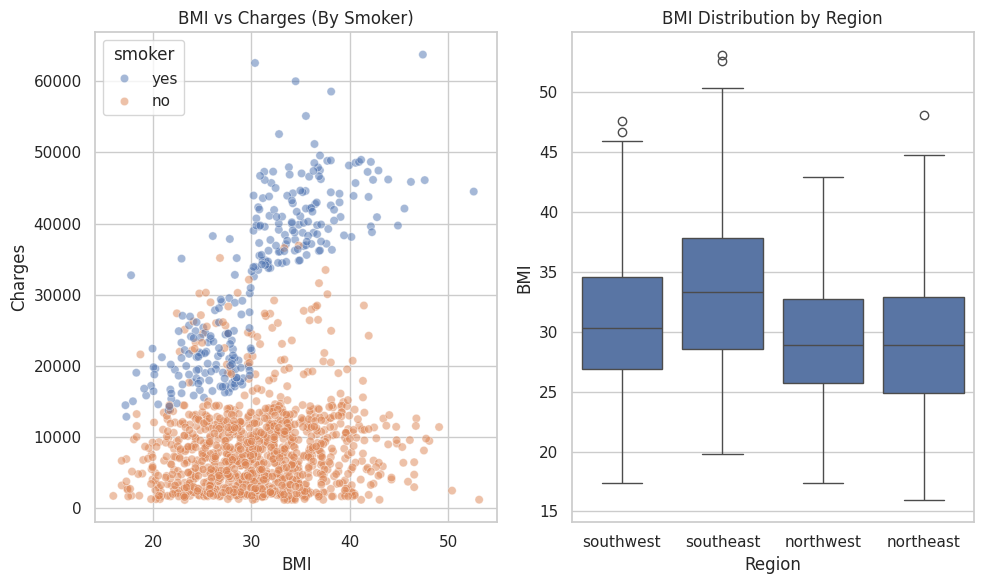

In [7]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=ins_data['bmi'], y=ins_data['charges'],hue=ins_data['smoker'],alpha=0.5)
plt.title('BMI vs Charges (By Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.subplot(1, 2, 2)
sns.boxplot(x=ins_data['region'], y=ins_data['bmi'], data=ins_data)
plt.title('BMI Distribution by Region')
plt.xlabel('Region')
plt.ylabel('BMI')

plt.tight_layout()

plt.show()

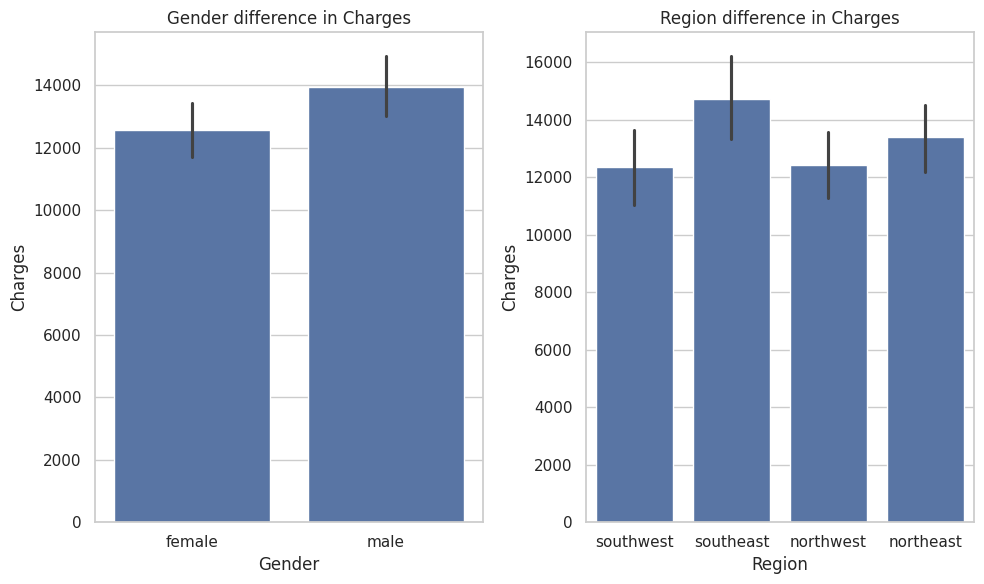

In [8]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

sns.barplot(x=ins_data['sex'], y=ins_data['charges'], data=ins_data)
plt.title('Gender difference in Charges')
plt.xlabel('Gender')
plt.ylabel('Charges')

plt.subplot(1, 2, 2)
sns.barplot(x=ins_data['region'], y=ins_data['charges'], data=ins_data)
plt.title('Region difference in Charges')
plt.xlabel('Region')
plt.ylabel('Charges')

plt.tight_layout()

plt.show()

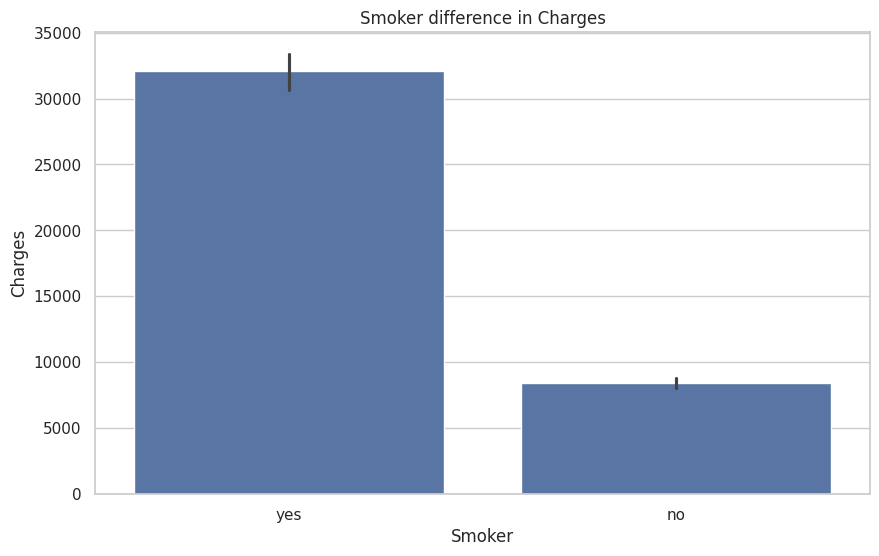

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ins_data['smoker'], y=ins_data['charges'], data=ins_data)
plt.title('Smoker difference in Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.show()

In [10]:
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
ins_data['sex_n'] = pd.factorize(ins_data['sex'])[0]
ins_data['smoker_n'] = pd.factorize(ins_data['smoker'])[0]
ins_data['region_n'] = pd.factorize(ins_data['region'])[0]
num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n', 'charges']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ins_data[num_variables])
total_scaled_data = pd.DataFrame(scaled_data, index=ins_data.index, columns=num_variables)
total_scaled_data.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [13]:
x = total_scaled_data.drop(['charges'], axis=1)
y = total_scaled_data['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_regression, k=3)
selector.fit(x_train, y_train)

selected_cols = x_train.columns[selector.get_support()]
x_train_selected = pd.DataFrame(selector.transform(x_train), columns=selected_cols)
x_test_selected = pd.DataFrame(selector.transform(x_test), columns=selected_cols)

x_train_selected.head()


,age,bmi,smoker_n
0,0.608696,0.107345,1.0
1,0.630435,0.224913,1.0
2,0.739130,0.239440,1.0
3,0.456522,0.493947,1.0
4,0.782609,0.148238,1.0


In [14]:
x_train_selected['charges'] = y_train.values
x_test_selected['charges'] = y_test.values

train_data = x_train_selected
test_data = x_test_selected

In [15]:

model1 = LinearRegression()
model1.fit(x_train_selected, y_train)

print(f'Intercept: {model1.intercept_}')
print(f'Coefficients: {model1.coef_}')

Intercept: -1.3877787807814457e-16
Coefficients: [-2.72641253e-16 -2.22044605e-16  3.60822483e-16  1.00000000e+00]


In [16]:
y_pred = model1.predict(x_test_selected)
y_pred

array([1.27268609e-01, 6.62473693e-02, 4.50275504e-01, 1.30569967e-01,
       5.20816775e-01, 5.45006209e-02, 1.58896716e-02, 2.08922013e-01,
       4.16729681e-02, 1.45934225e-01, 2.73547288e-01, 9.79248330e-02,
       4.51014272e-02, 7.18759614e-01, 7.59022863e-01, 6.87658004e-01,
       1.38534950e-01, 6.67979962e-01, 1.13509780e-01, 3.29655625e-01,
       6.31813799e-02, 1.00874269e-01, 2.14570156e-03, 2.60683917e-02,
       1.59041386e-01, 1.56461062e-01, 1.83926274e-01, 2.82255173e-01,
       1.37177421e-01, 1.53757738e-04, 2.34753188e-01, 1.71125256e-01,
       1.43447588e-02, 7.29714622e-02, 2.84478090e-02, 1.00984454e-01,
       2.35584862e-02, 9.92181574e-02, 3.63388894e-01, 5.99970784e-01,
       5.69194796e-02, 2.42845924e-02, 1.68435748e-01, 1.75632441e-01,
       6.01470481e-02, 1.78965888e-01, 3.92340228e-02, 5.21923953e-02,
       6.54486636e-01, 5.33345302e-02, 2.03760969e-01, 9.53832708e-03,
       4.36639943e-01, 9.37055704e-03, 1.51198251e-01, 3.86464768e-01,
      

In [17]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 1.9764030368181446e-32
R2: 1.0


In [23]:
from sklearn.compose import ColumnTransformer



categorical_features = ['sex', 'smoker', 'region']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(ins_data[categorical_features])
transformed_X = pd.DataFrame(transformed_X, columns=transformer.get_feature_names_out())

numerical_features = ins_data.drop(columns=categorical_features + ['charges'])
transformed_X = pd.concat([transformed_X, numerical_features], axis=1)


X2 = transformed_X
y2 = ins_data['charges']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X_train2, y_train2)


y_pred2 = model2.predict(X_test2)


mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)


In [24]:
print(f'MSE: {mean_squared_error(y_test2, y_pred2)}')
print(f'R2: {r2_score(y_test2, y_pred2)}')

MSE: 33596915.851361476
R2: 0.7835929767120722
